# K均值算法

## np.unique()
- 去除其中重复的元素 ，并按元素由小到大 返回一个新的无元素重复的元组或者列表
- https://blog.csdn.net/weixin_44211968/article/details/123772201
- numpy.unique(arr, return_index, return_inverse, return_counts)
- arr：输入数组，如果不是一维数组则会展开
- return_index：如果为 true，返回新列表元素在旧列表中的位置（下标），并以列表形式存储。
- return_inverse：如果为true，返回旧列表元素在新列表中的位置（下标），并以列表形式存储。
- return_counts：如果为 true，返回去重数组中的元素在原数组中的出现次数。

## plt.scatter()
- https://blog.csdn.net/TeFuirnever/article/details/88944438
- 生成一个scatter散点图

In [1]:
import numpy as np
import matplotlib.pyplot as plt
dataset = np.loadtxt('data/kmeans_data.csv', delimiter=',')
print('数据集大小：', len(dataset))

c:\Users\OneRaise\miniconda3\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\OneRaise\miniconda3\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\OneRaise\miniconda3\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


数据集大小： 80


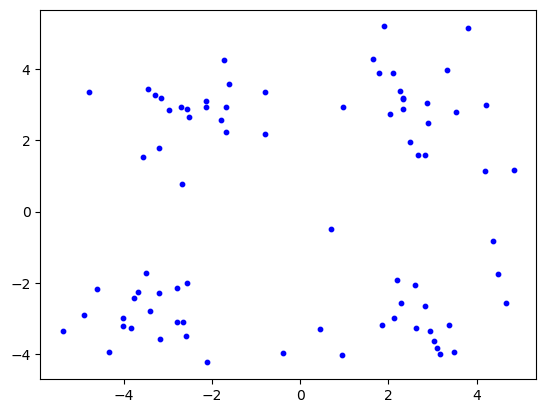

In [2]:
# 绘图函数
def show_cluster(dataset, cluster, centroids=None):
    # cluster：每个样本所属的聚类
    # centroids: 聚类中心点的坐标
    colors = ['blue', 'red', 'green', 'purple']
    markers = ['o', '^', 's', 'd']
    # 画出所有样例
    K = len(np.unique(cluster))
    for i in range(K):
        plt.scatter(dataset[cluster == i, 0], dataset[cluster == i, 1],
                    color=colors[i], marker=markers[i], s=10)
        
    # 画出中心点
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    color=colors[:K], marker='+', s=150)
    plt.show()

# 初始时不区分类别
show_cluster(dataset, np.zeros(len(dataset), dtype=int))

In [3]:
# 随机选取样本点
def random_init(dataset, K):
    # 随机选取不是重复的
    idx = np.random.choice(np.arange(len(dataset)), size=K, replace=False)
    return dataset[idx]

# K-means算法
def Kmeans(dataset, K, init_cent):
    # init_cent:初始化中心点的函数
    centroids = init_cent(dataset, K)
    cluster = np.zeros(len(dataset), dtype=int)
    changed = True
    # 开始迭代
    itr = 0
    while changed:
        changed = False
        loss = 0
        for i, data in enumerate(dataset):
            # 寻找最近的中心点
            dis = np.sum((centroids - data) ** 2, axis=-1)
            k = np.argmin(dis)
            # 更新当前样本所属的聚类
            if cluster[i] != k:
                cluster[i] = K
                changed = True
            # 计算损失函数
            loss += np.sum((data - centroids[k]) ** 2)
        # 绘图
        print(f'Iteration {itr}, Loss{loss:.3f}')
        show_cluster(dataset, cluster, centroids)
        # 更新中心点
        for i in range(K):
            centroids[i] = np.mean(dataset[cluster == i], axis=0)
        itr += 1
    return centroids, cluster
    

Iteration 0, Loss711.336


ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 4.

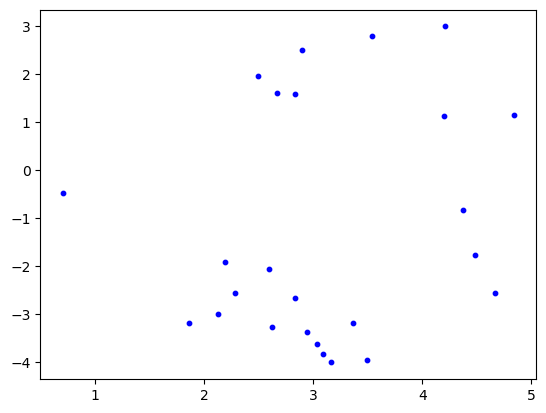

In [4]:
np.random.seed(0)
cent, cluster = Kmeans(dataset, 4, random_init)